# EuroSAT images classification
The [EuroSAT RGB](https://github.com/phelber/EuroSAT) dataset contains 27000 patches of Sentinel-2 64x64 pixels RGB images divided in 10 classes: Pasture, HerbaceousVegetation, Industrial, AnnualCrop, Residential, PermanentCrop, Highway, SeaLake, Forest, River. 

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import torch
import torch.nn as nn
import torchvision
warnings.filterwarnings('ignore')
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print("PyTorch version: %s"%torch.__version__)

NumPy version: 1.23.1
Pandas version: 1.4.3
PyTorch version: 1.13.0


We download the dataset into a local folder in order to create a training set, a validation set, and a test set. For each class we will use 70% of the images for training, 20% for validation, and 10% for test.

In [3]:
import os
import pathlib

imgdir_path = pathlib.Path('../../eurosatprj/data/EuroSAT/2750')
tot = 0
file_list = []
for folder_path in imgdir_path.glob('*'):
    print(f'{folder_path}')
    count = 0
    for file_path in folder_path.glob('*'): 
        #file_name = file_path.relative_to(folder_path)
        file_list.append(str(file_path))
        count += 1
    print(count)
    tot += count
print('Total number of files: {0:d}'.format(tot))

..\..\eurosatprj\data\EuroSAT\2750\AnnualCrop
3000
..\..\eurosatprj\data\EuroSAT\2750\Forest
3000
..\..\eurosatprj\data\EuroSAT\2750\HerbaceousVegetation
3000
..\..\eurosatprj\data\EuroSAT\2750\Highway
2500
..\..\eurosatprj\data\EuroSAT\2750\Industrial
2500
..\..\eurosatprj\data\EuroSAT\2750\Pasture
2000
..\..\eurosatprj\data\EuroSAT\2750\PermanentCrop
2500
..\..\eurosatprj\data\EuroSAT\2750\Residential
3000
..\..\eurosatprj\data\EuroSAT\2750\River
2500
..\..\eurosatprj\data\EuroSAT\2750\SeaLake
3000
Total number of files: 27000


In [4]:
len(file_list)

27000

In [6]:
import re

file_names = [str(os.path.basename(path)) for path in file_list]
reg_ex = r'(.+)_\d+.jpg$'
labels = [re.findall(reg_ex, file_name)[0] for file_name in file_names]
eurosat_classes = np.unique(labels).tolist()
num_labels = [eurosat_classes.index(label) for label in labels]

In [21]:
file_list[6001], labels[6001], num_labels[6001]

('..\\..\\eurosatprj\\data\\EuroSAT\\2750\\HerbaceousVegetation\\HerbaceousVegetation_10.jpg',
 'HerbaceousVegetation',
 2)

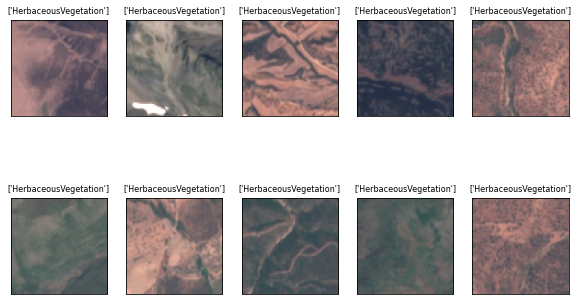

In [36]:
from itertools import islice
from PIL import Image

fig = plt.figure(figsize=(10, 6))
start = 6000
stop = 6010
for i, image in islice(enumerate(file_list), start, stop):
    ax = fig.add_subplot(2, 5, i - start + 1)
    ax.set_xticks([]); ax.set_yticks([])
    name = os.path.basename(image)
    reg_ex = r'(.+)_\d+.jpg$'
    label = re.findall(reg_ex, name)
    ax.set_title(f'{label}', size=8)
    img = Image.open(image)
    ax.imshow(img)
    


## The EuroSatDataset class

In [9]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import re

class EuroSatDataset(Dataset):
    def __init__(self, file_list, labels, transform=None, target_transform=None):
        self.labels = labels
        self.file_list = file_list
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        image = read_image(self.file_list[index])      
        label = self.labels[index]
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [10]:
import torchvision.transforms as transforms 

transform = transforms.Compose([
    transforms.ToTensor(),
])

In [13]:
eurosat_dataset = EuroSatDataset(file_list, labels)

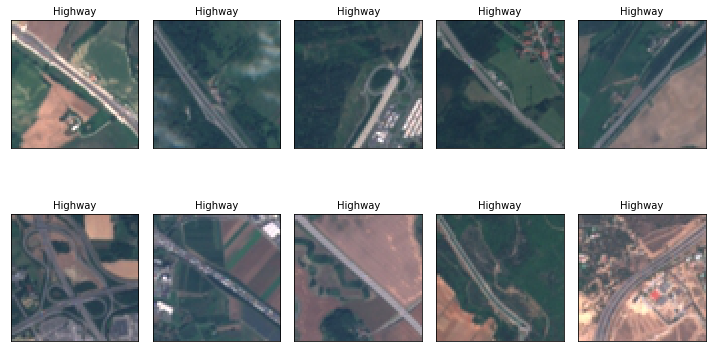

In [35]:
start = 9000
stop = 9010
fig = plt.figure(figsize=(10, 6))
for i, example in islice(enumerate(eurosat_dataset), start, stop):
    ax = fig.add_subplot(2, 5, i - start + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=10)
    
plt.tight_layout()
plt.show()